<a href="https://colab.research.google.com/github/asiyahnf12/Praktikum7_SPK/blob/main/Fuzzy_G_211_20_0117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-fuzzy --upgrade
#!pip install scikit-fuzzy==0.4.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=8fd64db5b623d415f7ac893c0cd60b0c4ffd2d1a62a27917358e3bb62938e1b9
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving UCI_Credit_Card.csv to UCI_Credit_Card.csv


In [8]:
base = pd.read_csv('UCI_Credit_Card.csv', header = 1)
base.shape

(29999, 25)

In [11]:
base.head()

,1,20000,2,2.1,1.1,24,2.2,2.3,-1,-1.1,...,0,0.1,0.2,0.3,689.1,0.4,0.5,0.6,0.7,1.2
0,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
1,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [13]:
base['BILL_TOTAL'] = base['0'] + base['0.1'] + base['0.2'] +  base['0.3'] + base['0.4'] + base['0.5']

In [14]:
base.head()

,1,20000,2,2.1,1.1,24,2.2,2.3,-1,-1.1,...,0.1,0.2,0.3,689.1,0.4,0.5,0.6,0.7,1.2,BILL_TOTAL
0,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,11988.0
1,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,48346.0
2,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,91120.0
3,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,80217.0
4,6,50000.0,1,1,2,37,0,0,0,0,...,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0,63194.0


In [15]:
X = base.iloc[:,[1,25]].values

In [16]:
X

array([[120000.,  11988.],
       [ 90000.,  48346.],
       [ 50000.,  91120.],
       ...,
       [ 30000.,  87017.],
       [ 80000., 202577.],
       [ 50000.,  88784.]])

In [17]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [18]:
X

array([[-0.36602017, -0.64714028],
       [-0.59724319, -0.46066787],
       [-0.90554055, -0.24128916],
       ...,
       [-1.05968923, -0.26233257],
       [-0.67431753,  0.33034997],
       [-0.90554055, -0.25327001]])

In [19]:
X.shape

(29999, 2)

In [20]:
X.T.shape

(2, 29999)

In [31]:
import skfuzzy as fuzzy

r = fuzzy.cmeans(data=X.T, c=3, m=2, error=0.005, maxiter=1000, init=None)

In [32]:
r

(array([[ 0.80632979,  2.03400732],
        [ 0.94957157, -0.37132993],
        [-0.73850142, -0.319727  ]]),
 array([[0.02465716, 0.00475774, 0.0041422 , ..., 0.01170892, 0.06864633,
         0.00390756],
        [0.11685411, 0.0162384 , 0.00971064, ..., 0.02531829, 0.11175951,
         0.00923025],
        [0.85848873, 0.97900386, 0.98614715, ..., 0.9629728 , 0.81959415,
         0.9868622 ]]),
 array([[0.15477662, 0.31188596, 0.52220306, ..., 0.18832623, 0.32769008,
         0.35007247],
        [0.58813749, 0.02578538, 0.32656019, ..., 0.2209221 , 0.57914167,
         0.21185133],
        [0.25708588, 0.66232866, 0.15123675, ..., 0.59075167, 0.09316825,
         0.4380762 ]]),
 array([[2.92625305, 2.86241531, 2.84736267, ..., 2.95891938, 2.25715858,
         2.85694551],
        [1.34419231, 1.54939252, 1.85966437, ..., 2.01221504, 1.76900269,
         1.85886501],
        [0.49592513, 0.19954502, 0.1845388 , ..., 0.32627555, 0.65323782,
         0.17977376]]),
 array([25768.068310

In [33]:
previsoes_porcentagem = r[1]

In [34]:
previsoes_porcentagem.shape

(3, 29999)

In [35]:
previsoes_porcentagem

array([[0.02465716, 0.00475774, 0.0041422 , ..., 0.01170892, 0.06864633,
        0.00390756],
       [0.11685411, 0.0162384 , 0.00971064, ..., 0.02531829, 0.11175951,
        0.00923025],
       [0.85848873, 0.97900386, 0.98614715, ..., 0.9629728 , 0.81959415,
        0.9868622 ]])

In [36]:
previsoes_porcentagem[0][0]

0.02465716056877907

In [37]:
previsoes_porcentagem[1][0]

0.11685411396950832

In [38]:
previsoes_porcentagem[2][0]

0.8584887254617127

In [39]:
previsoes_porcentagem[0][0] + previsoes_porcentagem[1][0] + previsoes_porcentagem[2][0]

1.0

In [40]:
previsoes = previsoes_porcentagem.argmax(axis=0)

In [41]:
previsoes

array([2, 2, 2, ..., 2, 2, 2])

In [42]:
previsoes[5000]

1

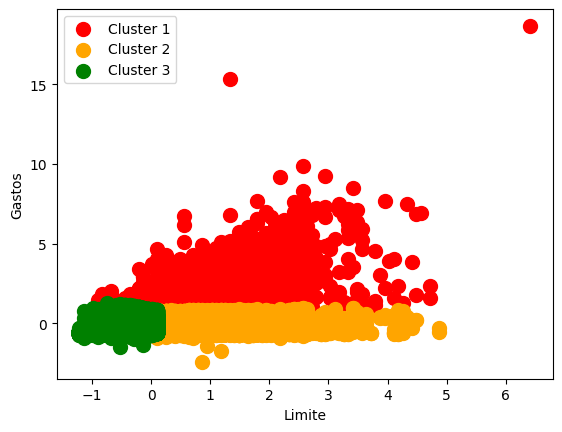

In [43]:
plt.scatter(X[previsoes == 0,0], X[previsoes == 0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1,0], X[previsoes == 1,1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(X[previsoes == 2,0], X[previsoes == 2,1], s = 100, c = 'green', label = 'Cluster 3')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend();